# improt the important libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
#load the basic libraries
plt.style.use('default')
import tensorflow as tf
#load libraries for data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
#load libraries for building CNN
from tensorflow.keras.layers import *
from tensorflow.keras import layers , models, optimizers
from tensorflow.keras.models import Sequential, Model
#load libraries for ResNet transfer learning
from tensorflow.keras.applications import ResNet50V2
#load libraries for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#load libraries for visualizing
from tensorflow.keras.utils import plot_model
#load libraries for data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
#load libraries for building CNN
from tensorflow.keras.layers import *
from tensorflow.keras import layers , models, optimizers
from tensorflow.keras.models import Sequential, Model
#load libraries for ResNet transfer learning
from tensorflow.keras.applications import ResNet50V2
#load libraries for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#load libraries for visualizing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras_self_attention import SeqSelfAttention
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Attention, Input

# Data load and pre-processing:

In [2]:
print(os.listdir("C:/Users/tahir_02svck/UK project/archive (2)"))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [3]:
data_path = 'C:/Users/tahir_02svck/UK project/archive (2)'
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(967, 48, 48, 3)

In [4]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [9]:
Y = to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
print(X_train)
print(y_train)

[[[[0.3372549  0.3372549  0.3372549 ]
   [0.34117648 0.34117648 0.34117648]
   [0.34117648 0.34117648 0.34117648]
   ...
   [0.3764706  0.3764706  0.3764706 ]
   [0.3764706  0.3764706  0.3764706 ]
   [0.37254903 0.37254903 0.37254903]]

  [[0.3372549  0.3372549  0.3372549 ]
   [0.3372549  0.3372549  0.3372549 ]
   [0.3372549  0.3372549  0.3372549 ]
   ...
   [0.36862746 0.36862746 0.36862746]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.3372549  0.3372549  0.3372549 ]
   [0.3372549  0.3372549  0.3372549 ]
   [0.32941177 0.32941177 0.32941177]
   ...
   [0.37254903 0.37254903 0.37254903]
   [0.36862746 0.36862746 0.36862746]
   [0.36862746 0.36862746 0.36862746]]

  ...

  [[0.3137255  0.3137255  0.3137255 ]
   [0.30588236 0.30588236 0.30588236]
   [0.27450982 0.27450982 0.27450982]
   ...
   [0.3529412  0.3529412  0.3529412 ]
   [0.34901962 0.34901962 0.34901962]
   [0.34509805 0.34509805 0.34509805]]

  [[0.3137255  0.3137255  0.3137255 ]
   [0.3

# Attention CNN model using SVM and Random forest Classifier

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Attention, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Function to create Att_CNN+RF or Att_CNN+SVM model
def create_model_with_attention(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers
    x = Conv2D(16, (5, 5), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(32, (5, 5), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Attention layers
    att_1 = Attention()([x, x])
    x = att_1

    att_2 = Attention()([x, x])
    x = att_2

    att_3 = Attention()([x, x])
    x = att_3

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    outputs = Dense(7, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

    return model

# Assuming input_shape is defined (48, 48, 3)
input_shape = (48, 48, 3)
model_custom_with_attention = create_model_with_attention(input_shape)
model_custom_with_attention.summary()

# Assuming you have the data (img_data, labels, num_classes) already loaded

# Convert labels to categorical
Y = to_categorical(labels, num_classes)

# Shuffle the dataset
x, y = shuffle(img_data, Y, random_state=2)

# Use StratifiedKFold for 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Lists to store accuracy and loss values for each fold
rf_accuracies = []
rf_losses = []
svm_accuracies = []
svm_losses = []
hist_rf_list = []  # List to store individual training histories for Att_CNN+RF
hist_svm_list = []  # List to store individual training histories for Att_CNN+SVM
k_no = 0
EPOCHS = 100

for train_index, test_index in kf.split(x, np.argmax(y, axis=1)):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    file_path_rf = "Att_CNN_RF_best_weights_best_"+str(k_no)+".hdf5"
    file_path_svm = "Att_CNN_SVM_best_weights_best_"+str(k_no)+".hdf5"

    checkpoint_rf = ModelCheckpoint(file_path_rf, monitor='loss', verbose=0, save_best_only=True, mode='min')
    checkpoint_svm = ModelCheckpoint(file_path_svm, monitor='loss', verbose=0, save_best_only=True, mode='min')
    
    early_rf = EarlyStopping(monitor="loss", mode="min", patience=8)
    early_svm = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list_rf = [checkpoint_rf, early_rf]
    callbacks_list_svm = [checkpoint_svm, early_svm]

    # Train Att_CNN+RF model
    model_rf = create_model_with_attention(input_shape=X_Train_.shape[1:])
    hist_rf = model_rf.fit(
        x=aug.flow(X_Train_, Y_Train),
        epochs=EPOCHS,
        validation_data=(X_Test_, Y_Test),
        callbacks=callbacks_list_rf,
        verbose=1
    )
    hist_rf_list.append(hist_rf)  # Store the training history for later plotting

    # Find the index of the flatten layer
    flatten_layer_index_rf = [index for index, layer in enumerate(model_rf.layers) if isinstance(layer, Flatten)][0]

    # Create a new model for feature extraction
    feature_extractor_rf = Model(inputs=model_rf.input, outputs=model_rf.layers[flatten_layer_index_rf].output)
    train_features_rf = feature_extractor_rf.predict(X_Train_)
    test_features_rf = feature_extractor_rf.predict(X_Test_)

    # Flatten the features
    train_features_flatten_rf = train_features_rf.reshape(train_features_rf.shape[0], -1)
    test_features_flatten_rf = test_features_rf.reshape(test_features_rf.shape[0], -1)

    # Train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(train_features_flatten_rf, np.argmax(Y_Train, axis=1))

    # Evaluate Random Forest Classifier
    rf_predictions = rf_classifier.predict(test_features_flatten_rf)
    rf_accuracy = accuracy_score(np.argmax(Y_Test, axis=1), rf_predictions)
    rf_loss = model_rf.evaluate(X_Test_, Y_Test, verbose=0)[0]
    print(f'Fold {k_no + 1} - Random Forest Accuracy: {rf_accuracy}, Loss: {rf_loss}')
    rf_accuracies.append(rf_accuracy)
    rf_losses.append(rf_loss)

    # Train Att_CNN+SVM model
    model_svm = create_model_with_attention(input_shape=X_Train_.shape[1:])
    hist_svm = model_svm.fit(
        x=aug.flow(X_Train_, Y_Train),
        epochs=EPOCHS,
        validation_data=(X_Test_, Y_Test),
        callbacks=callbacks_list_svm,
        verbose=1
    )
    hist_svm_list.append(hist_svm)  # Store the training history for later plotting

    # Find the index of the flatten layer
    flatten_layer_index_svm = [index for index, layer in enumerate(model_svm.layers) if isinstance(layer, Flatten)][0]

    # Create a new model for feature extraction
    feature_extractor_svm = Model(inputs=model_svm.input, outputs=model_svm.layers[flatten_layer_index_svm].output)
    train_features_svm = feature_extractor_svm.predict(X_Train_)
    test_features_svm = feature_extractor_svm.predict(X_Test_)

    # Flatten the features
    train_features_flatten_svm = train_features_svm.reshape(train_features_svm.shape[0], -1)
    test_features_flatten_svm = test_features_svm.reshape(test_features_svm.shape[0], -1)

    # Train an SVM Classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(train_features_flatten_svm, np.argmax(Y_Train, axis=1))

    # Evaluate SVM Classifier
    svm_predictions = svm_classifier.predict(test_features_flatten_svm)
    svm_accuracy = accuracy_score(np.argmax(Y_Test, axis=1), svm_predictions)
    svm_loss = model_svm.evaluate(X_Test_, Y_Test, verbose=0)[0]
    print(f'Fold {k_no + 1} - SVM Accuracy: {svm_accuracy}, Loss: {svm_loss}')
    svm_accuracies.append(svm_accuracy)
    svm_losses.append(svm_loss)

    k_no += 1

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_69 (Conv2D)             (None, 48, 48, 16)   1216        ['input_24[0][0]']               
                                                                                                  
 max_pooling2d_69 (MaxPooling2D  (None, 24, 24, 16)  0           ['conv2d_69[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_70 (Conv2D)             (None, 24, 24, 32)   12832       ['max_pooling2d_69[0][0]']

# Visualizatin Results for 5 folds using both the Classifier

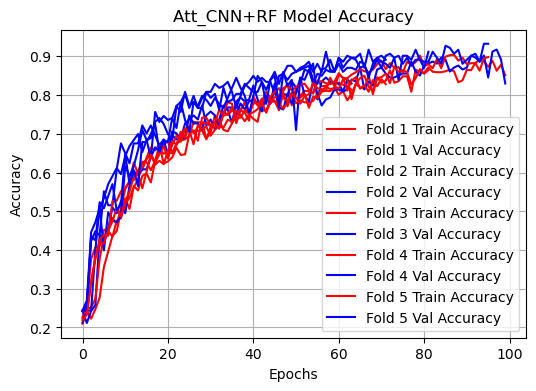

In [66]:
# Plotting train vs validation accuracy for Att_CNN+RF
plt.figure(figsize=(6, 4))

for k_no, hist_rf in enumerate(hist_rf_list, start=1):
    num_epochs = len(hist_rf.history['accuracy'])
    plt.plot(range(num_epochs), hist_rf.history['accuracy'], 'r', label=f'Fold {k_no} Train Accuracy')
    plt.plot(range(num_epochs), hist_rf.history['val_accuracy'], 'b', label=f'Fold {k_no} Val Accuracy')

plt.title('Att_CNN+RF Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('att_cnn_RF_model_acc.png', dpi=1200)
plt.show()


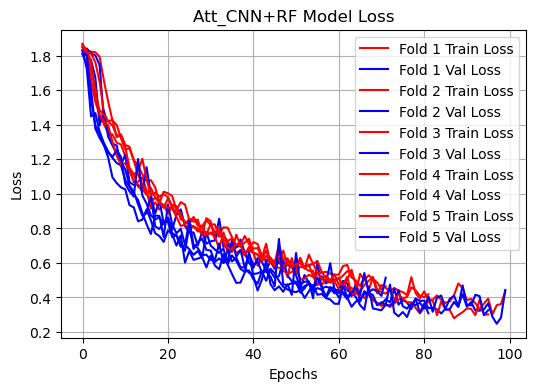

In [56]:
# Plotting train vs validation losses for Att_CNN+RF
plt.figure(figsize=(6, 4))

for k_no, hist_rf in enumerate(hist_rf_list, start=1):
    num_epochs = len(hist_rf.history['loss'])
    plt.plot(range(num_epochs), hist_rf.history['loss'], 'r', label=f'Fold {k_no} Train Loss')
    plt.plot(range(num_epochs), hist_rf.history['val_loss'], 'b', label=f'Fold {k_no} Val Loss')

plt.title('Att_CNN+RF Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('att_cnn_RF_model_loss.png', dpi=1200)
plt.show()

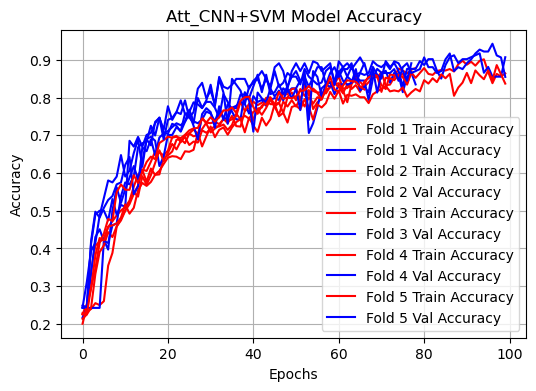

In [63]:
# Plotting train vs validation accuracy for Att_CNN+SVM
plt.figure(figsize=(6, 4))

for k_no, hist_svm in enumerate(hist_svm_list, start=1):
    num_epochs = len(hist_svm.history['accuracy'])
    plt.plot(range(num_epochs), hist_svm.history['accuracy'], 'r', label=f'Fold {k_no} Train Accuracy')
    plt.plot(range(num_epochs), hist_svm.history['val_accuracy'], 'b', label=f'Fold {k_no} Val Accuracy')

plt.title('Att_CNN+SVM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('att_cnn_SVM_model_acc.png', dpi=1200)

plt.show()


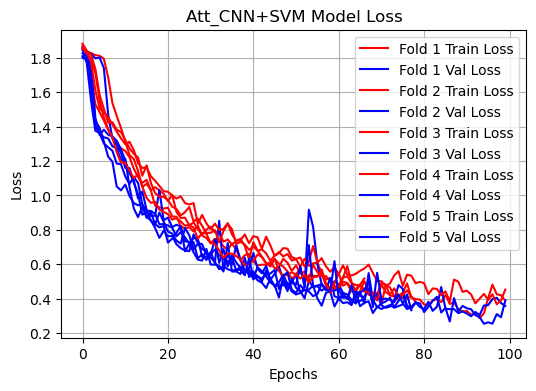

In [64]:
# Plotting train vs validation losses for Att_CNN+SVM
plt.figure(figsize=(6, 4))

for k_no, hist_svm in enumerate(hist_svm_list, start=1):
    num_epochs = len(hist_svm.history['loss'])
    plt.plot(range(num_epochs), hist_svm.history['loss'], 'r', label=f'Fold {k_no} Train Loss')
    plt.plot(range(num_epochs), hist_svm.history['val_loss'], 'b', label=f'Fold {k_no} Val Loss')

plt.title('Att_CNN+SVM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('att_cnn_SVM_model_loss.png', dpi=1200)

plt.show()


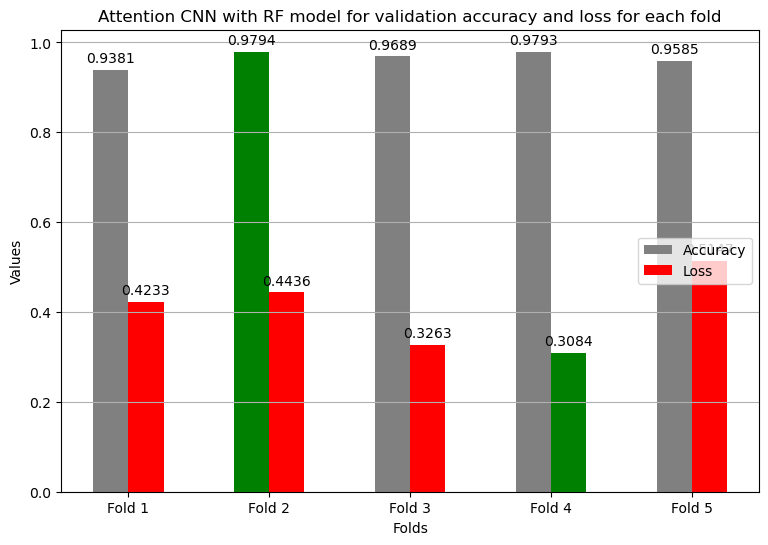

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
fold_labels = [f"Fold {i + 1}" for i in range(len(rf_accuracies))]
accuracy_values = rf_accuracies
loss_values = rf_losses

# Find the index of the best accuracy and best loss
best_acc_fold_index = np.argmax(rf_accuracies)
best_loss_fold_index = np.argmin(rf_losses)

# Grouped bar plot for accuracy and loss
bar_width = 0.25
index = np.arange(len(fold_labels))

fig, ax = plt.subplots(figsize=(9, 6))
bar1 = ax.bar(index, accuracy_values, bar_width, color=['green' if i == best_acc_fold_index else 'gray' for i in range(len(fold_labels))], label='Accuracy')
bar2 = ax.bar(index + bar_width, loss_values, bar_width, color=['green' if i == best_loss_fold_index else 'red' for i in range(len(fold_labels))], label='Loss')

# Annotate values on each bar
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom')

for i, v in enumerate(loss_values):
    ax.text(i + bar_width, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom')

ax.set_xlabel('Folds')
ax.set_ylabel('Values')
ax.set_title('Attention CNN with RF model for validation accuracy and loss for each fold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(fold_labels)
ax.legend(loc='center right')  # Adjust legend placement
ax.grid(axis='y')

# Save the figure with DPI 1200
# plt.savefig('Att_CNN_RF_Each_Fold_Performance.png', dpi=1200)

plt.show()


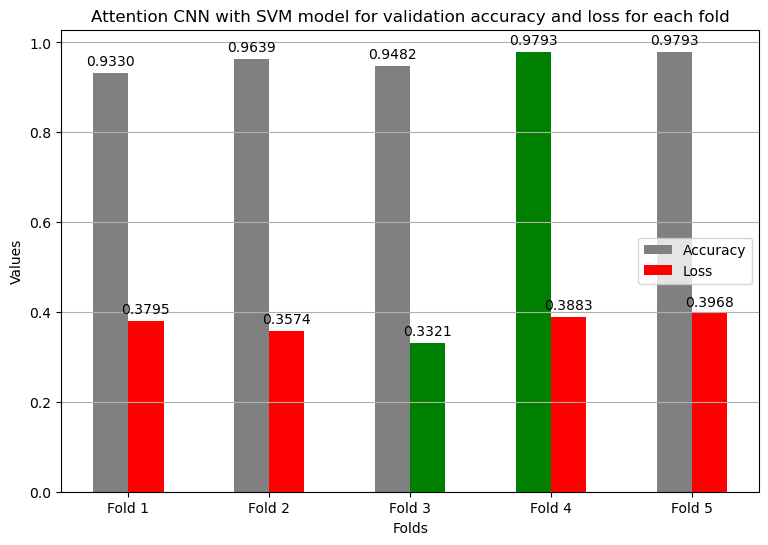

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
fold_labels = [f"Fold {i + 1}" for i in range(len(svm_accuracies))]
accuracy_values = svm_accuracies
loss_values = svm_losses

# Find the index of the best accuracy and best loss
best_acc_fold_index = np.argmax(svm_accuracies)
best_loss_fold_index = np.argmin(svm_losses)

# Grouped bar plot for accuracy and loss
bar_width = 0.25
index = np.arange(len(fold_labels))

fig, ax = plt.subplots(figsize=(9, 6))
bar1 = ax.bar(index, accuracy_values, bar_width, color=['green' if i == best_acc_fold_index else 'gray' for i in range(len(fold_labels))], label='Accuracy')
bar2 = ax.bar(index + bar_width, loss_values, bar_width, color=['green' if i == best_loss_fold_index else 'red' for i in range(len(fold_labels))], label='Loss')

# Annotate values on each bar
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom')

for i, v in enumerate(loss_values):
    ax.text(i + bar_width, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom')

ax.set_xlabel('Folds')
ax.set_ylabel('Values')
ax.set_title('Attention CNN with SVM model for validation accuracy and loss for each fold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(fold_labels)
ax.legend(loc='center right')  # Adjust legend placement
ax.grid(axis='y')

# Save the figure with DPI 1200
plt.savefig('Att_CNN_SVM_Each_Fold_Performance.png', dpi=1200)

plt.show()


# Confusion Metrix for Test dataset evaluation for Att_CNN+RF and Att_CNN+SVM Model

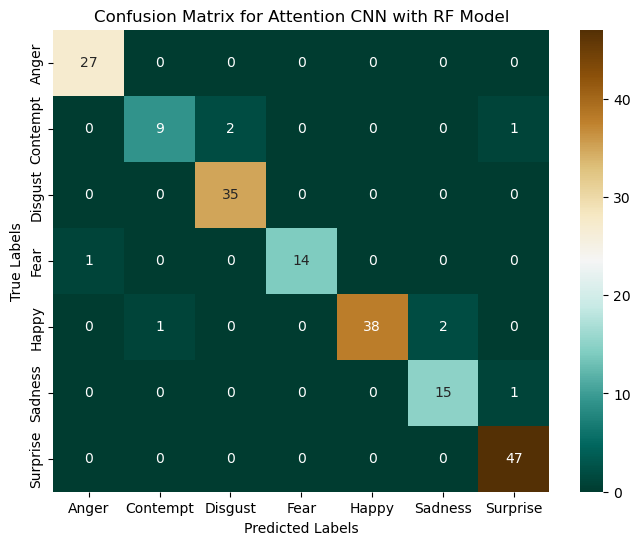

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have the test data (X_test, Y_test) for both RF and SVM models
# If not, you may need to split your data into training and testing sets

# Replace these with the appropriate models and test data
model_rf = feature_extractor_rf  # Use the feature extractor model for RF
model_svm = feature_extractor_svm  # Use the feature extractor model for SVM
X_test_rf, Y_test_rf = X_Test_, Y_Test  # Replace with the actual test data for RF
X_test_svm, Y_test_svm = X_Test_, Y_Test  # Replace with the actual test data for SVM

# Generate predictions for RF model
rf_predictions = rf_classifier.predict(test_features_flatten_rf)
rf_cm = confusion_matrix(np.argmax(Y_test_rf, axis=1), rf_predictions)

label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# ...

# Plot Confusion Matrix for RF model
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='BrBG_r', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix for Attention CNN with RF Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_metrics_CNN+RF.png', dpi=1200)

plt.show()


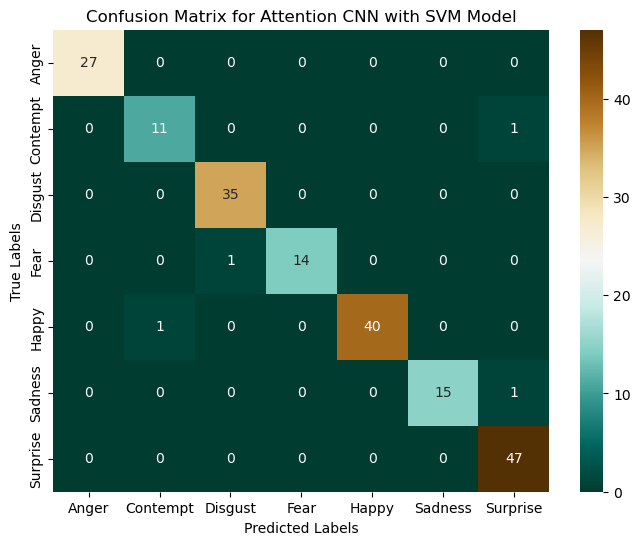

In [76]:
# Plot Confusion Matrix for SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='BrBG_r', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix for Attention CNN with SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_metrics_CNN+SVM.png', dpi=1200)

plt.show()

# ROC Curve for all the class using both classifier

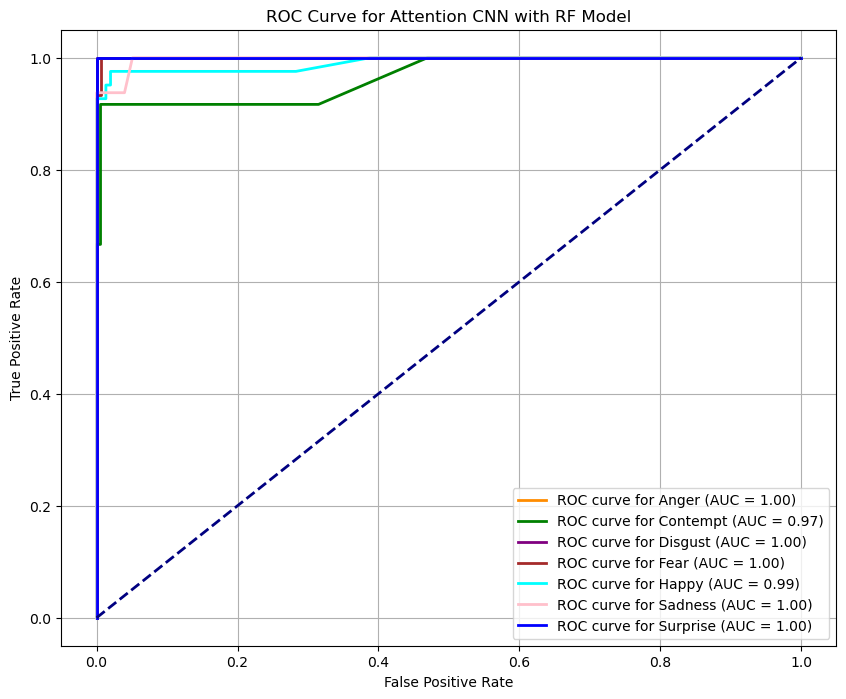

In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted probabilities for each class
rf_y_score = rf_classifier.predict_proba(test_features_flatten_rf)

# Assuming Y_Test is the true labels in one-hot encoded format
# Extracting binary true labels for each class
rf_y_true = label_binarize(np.argmax(Y_Test, axis=1), classes=np.arange(7))

# Compute ROC curve and ROC area for each class
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()

for i in range(7):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(rf_y_true[:, i], rf_y_score[:, i])
    rf_auc[i] = auc(rf_fpr[i], rf_tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'green', 'purple', 'brown', 'cyan', 'pink', 'blue']

for i in range(7):
    plt.plot(rf_fpr[i], rf_tpr[i], color=colors[i], lw=2, label=f'ROC curve for {label_names[i]} (AUC = {rf_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Attention CNN with RF Model')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('roc_curve_CNN+RF.png', dpi=1200)
plt.show()


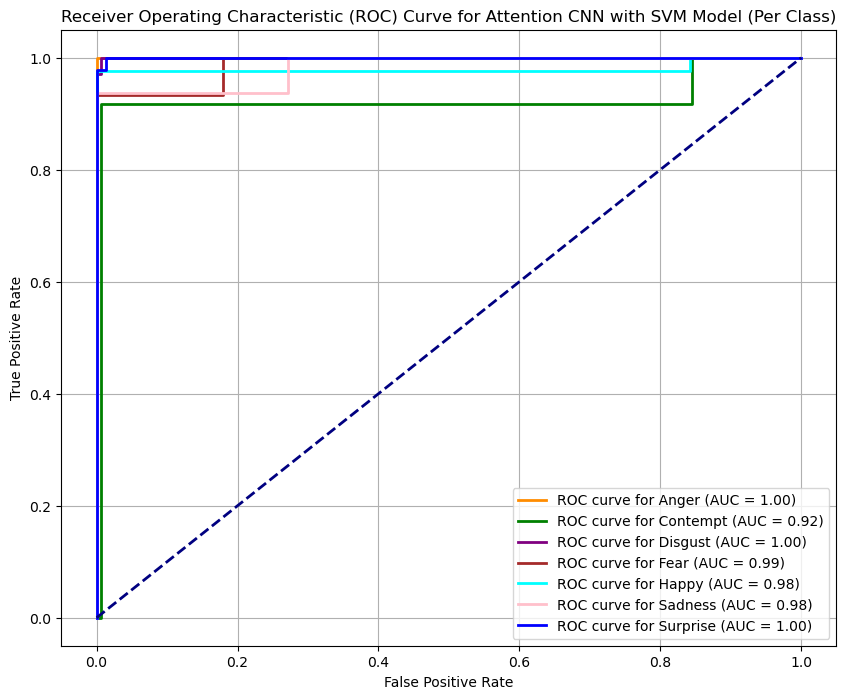

In [87]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted probabilities for each class
svm_y_score = svm_classifier.decision_function(test_features_flatten_svm)

# Assuming Y_Test is the true labels in one-hot encoded format
# Extracting binary true labels for each class
svm_y_true = label_binarize(np.argmax(Y_Test, axis=1), classes=np.arange(7))

# Compute ROC curve and ROC area for each class
svm_fpr = dict()
svm_tpr = dict()
svm_auc = dict()

for i in range(7):
    svm_fpr[i], svm_tpr[i], _ = roc_curve(svm_y_true[:, i], svm_y_score[:, i])
    svm_auc[i] = auc(svm_fpr[i], svm_tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'green', 'purple', 'brown', 'cyan', 'pink', 'blue']

for i in range(7):
    plt.plot(svm_fpr[i], svm_tpr[i], color=colors[i], lw=2, label=f'ROC curve for {label_names[i]} (AUC = {svm_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Attention CNN with SVM Model (Per Class)')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('roc_curve_per_class_CNN+SVM.png', dpi=1200)
plt.show()


# Visual results of Attention_CNN model with RF classifier model:


1/1 [==============================] - 0s 30ms/step


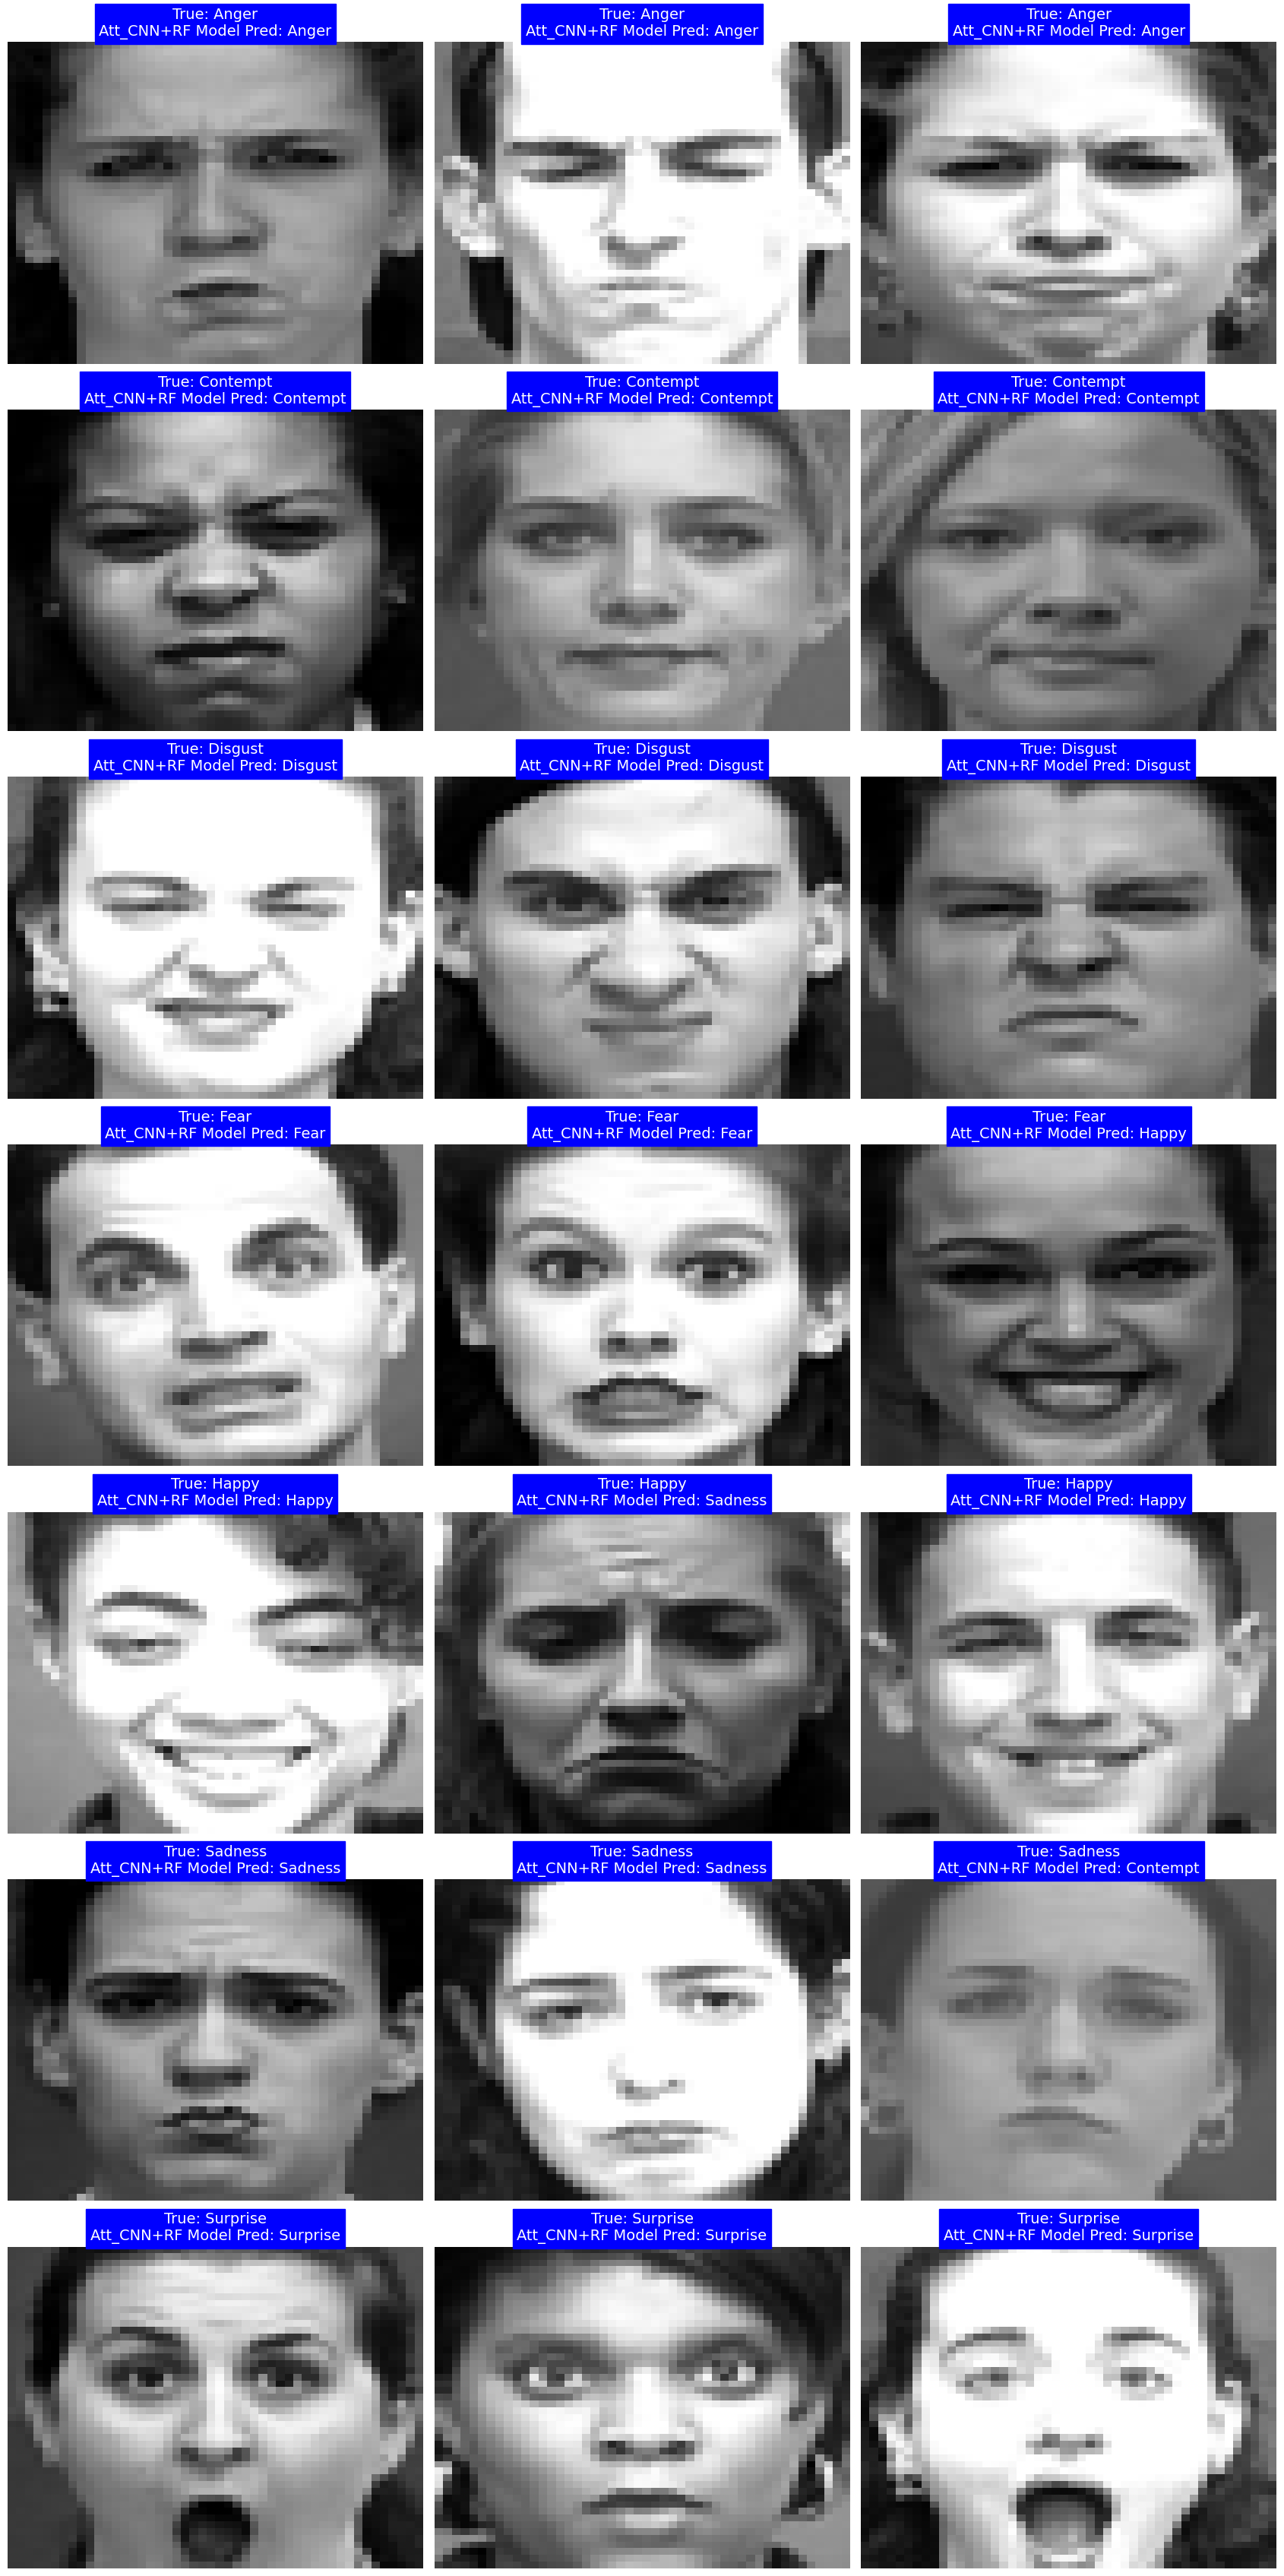

In [125]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+RF
model_path = 'Att_CNN_RF_best_weights_best_4.hdf5'
loaded_model_rf = load_model(model_path)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 7
num_cols = 3  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 34))

# Lists to store predictions for each fold
rf_predictions = []

# Visualize one image from each class
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first available image for the class
        if len(class_indices) > 0:
            idx = class_indices[class_count[label_names[i]] % len(class_indices)]

            # Assuming you have predictions from your model
            rf_pred_probs = loaded_model_rf.predict(X_Test_[idx].reshape(1, 48, 48, 3))[0]
            rf_pred_idx = np.argmax(rf_pred_probs)

            img = X_Test_[idx]

            # Increase the size of the image
            axes[i, j].imshow(img, interpolation='nearest', aspect='auto')

            true_label = label_names[np.argmax(Y_Test[idx])]

            # Customize labels with different colors
            title = f'True: {true_label}\nAtt_CNN+RF Model Pred: {label_names[rf_pred_idx]}'
            axes[i, j].set_title(title, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count[label_names[i]] += 1

            # Store predictions for later use
            rf_predictions.append(rf_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+RF0.png', dpi=1200)

plt.show()


1/1 [==============================] - 0s 34ms/step


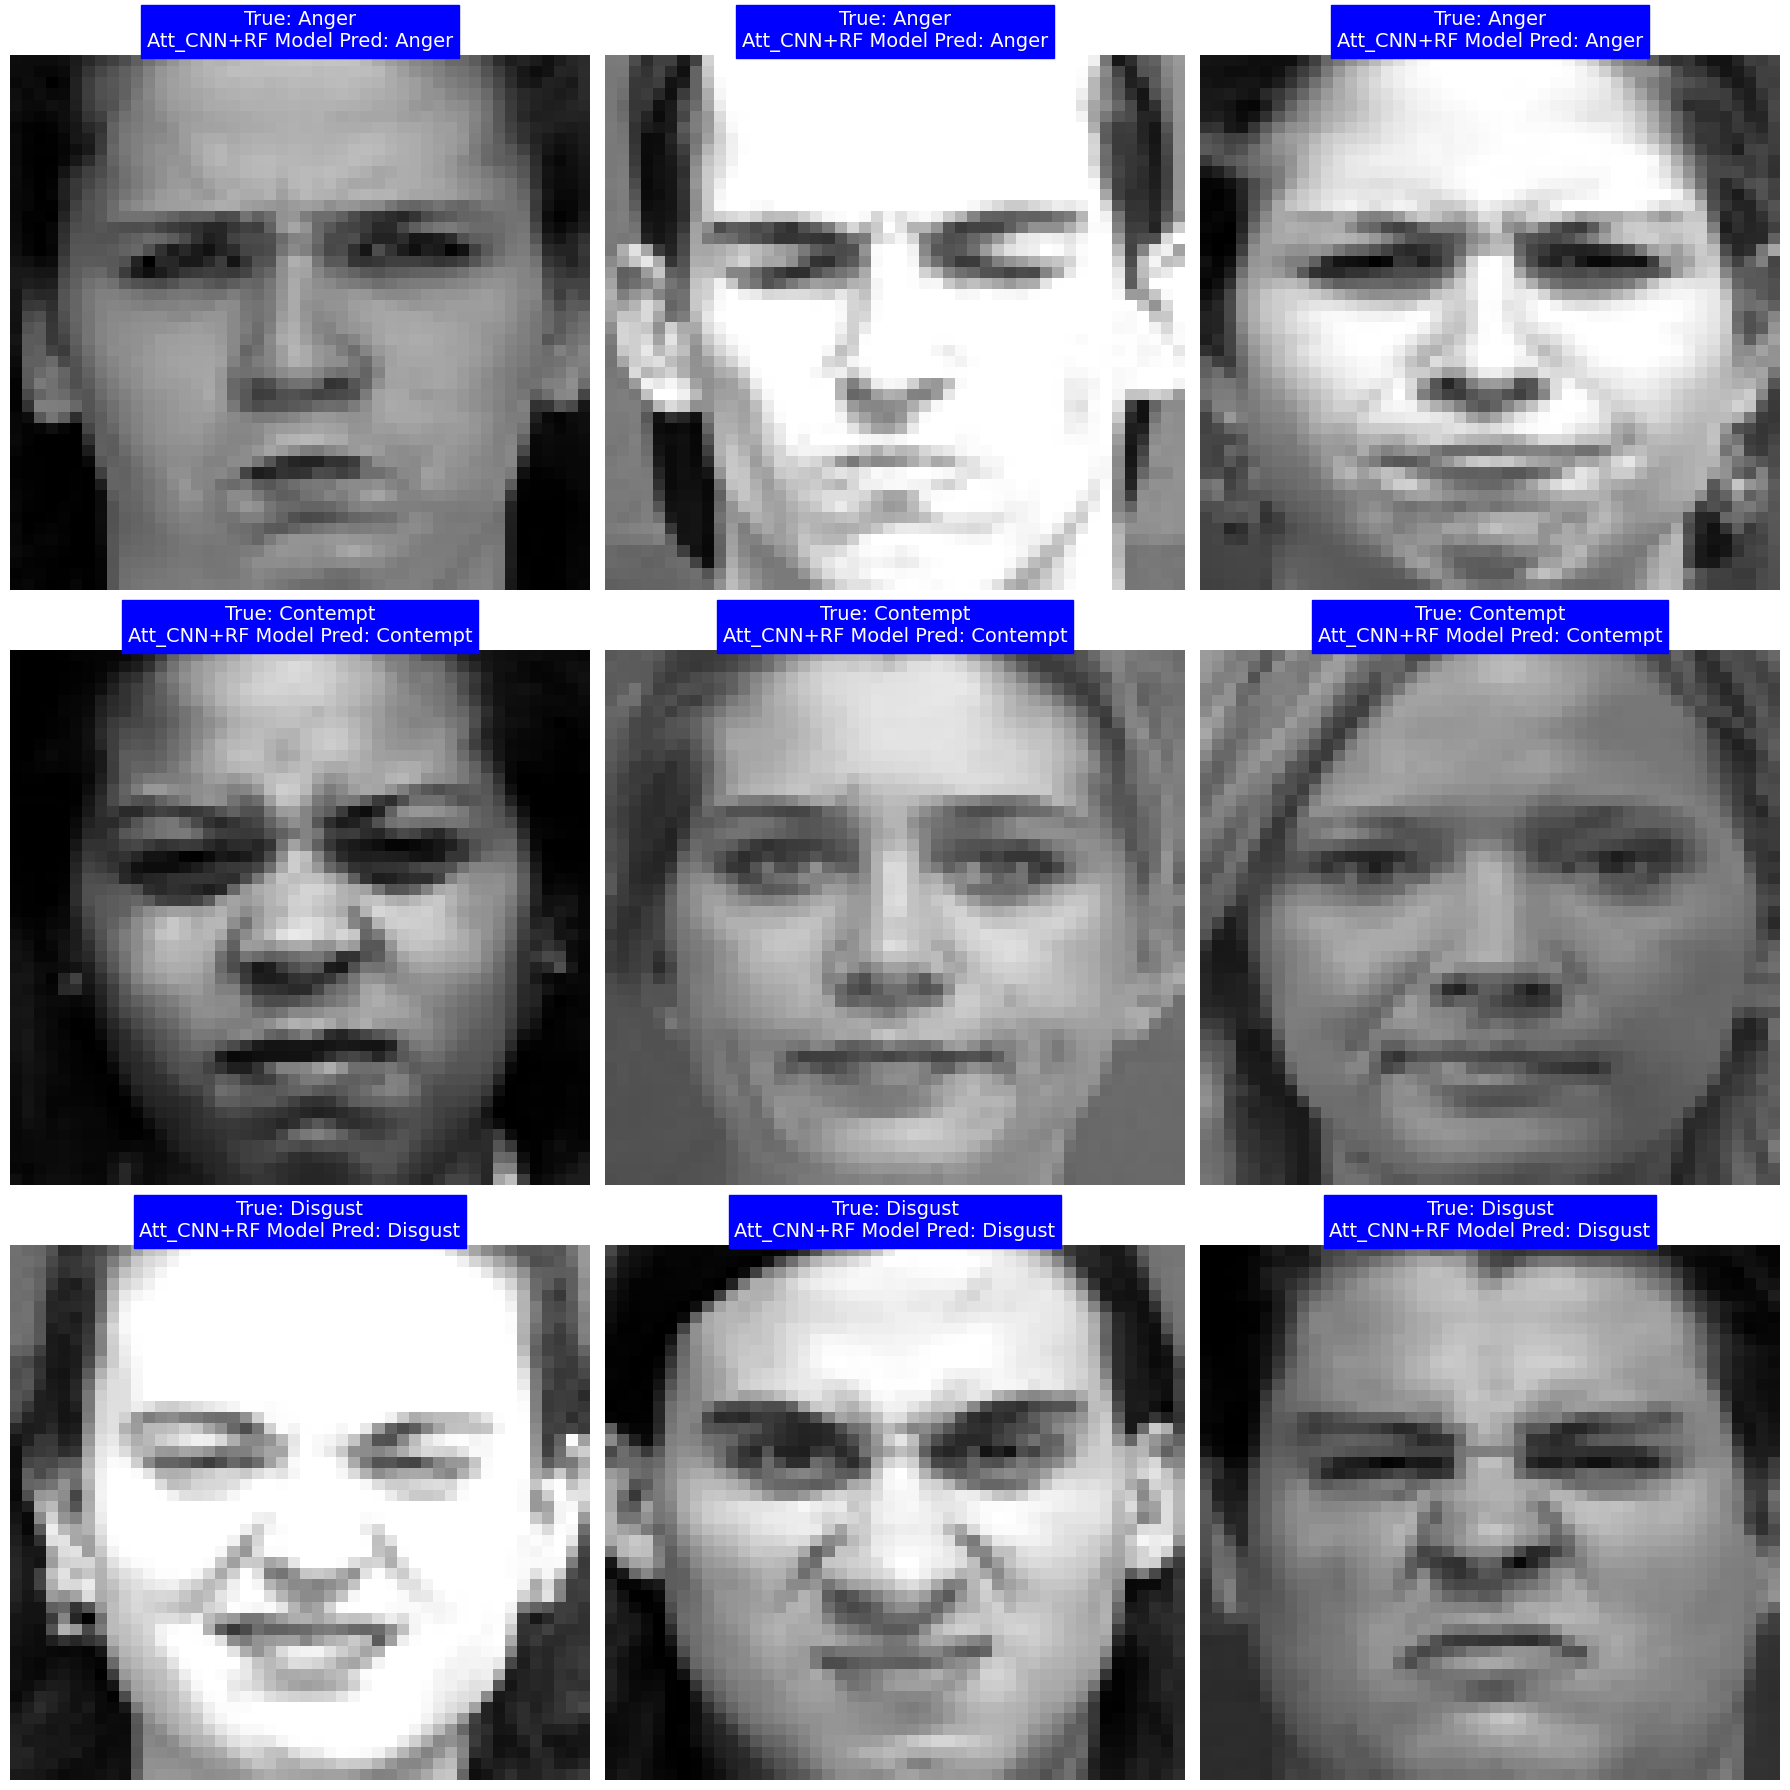

In [108]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+RF
model_path = 'Att_CNN_RF_best_weights_best_4.hdf5'
loaded_model_rf = load_model(model_path)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Lists to store predictions for each fold
rf_predictions = []

# Visualize the same three images in columns and three in rows
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first three images if available
        if len(class_indices) > 0:
            idx = class_indices[class_count[label_names[i]] % len(class_indices)]

            # Assuming you have predictions from your model
            rf_pred_probs = loaded_model_rf.predict(X_Test_[idx].reshape(1, 48, 48, 3))[0]
            rf_pred_idx = np.argmax(rf_pred_probs)

            img = X_Test_[idx]

            # Increase the size of the image
            axes[i, j].imshow(img, interpolation='nearest', aspect='auto')

            true_label = label_names[np.argmax(Y_Test[idx])]

            # Customize labels with different colors
            title = f'True: {true_label}\nAtt_CNN+RF Model Pred: {label_names[rf_pred_idx]}'
            axes[i, j].set_title(title, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count[label_names[i]] += 1

            # Store predictions for later use
            rf_predictions.append(rf_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+RF.png', dpi=1200)

plt.show()


1/1 [==============================] - 0s 47ms/step


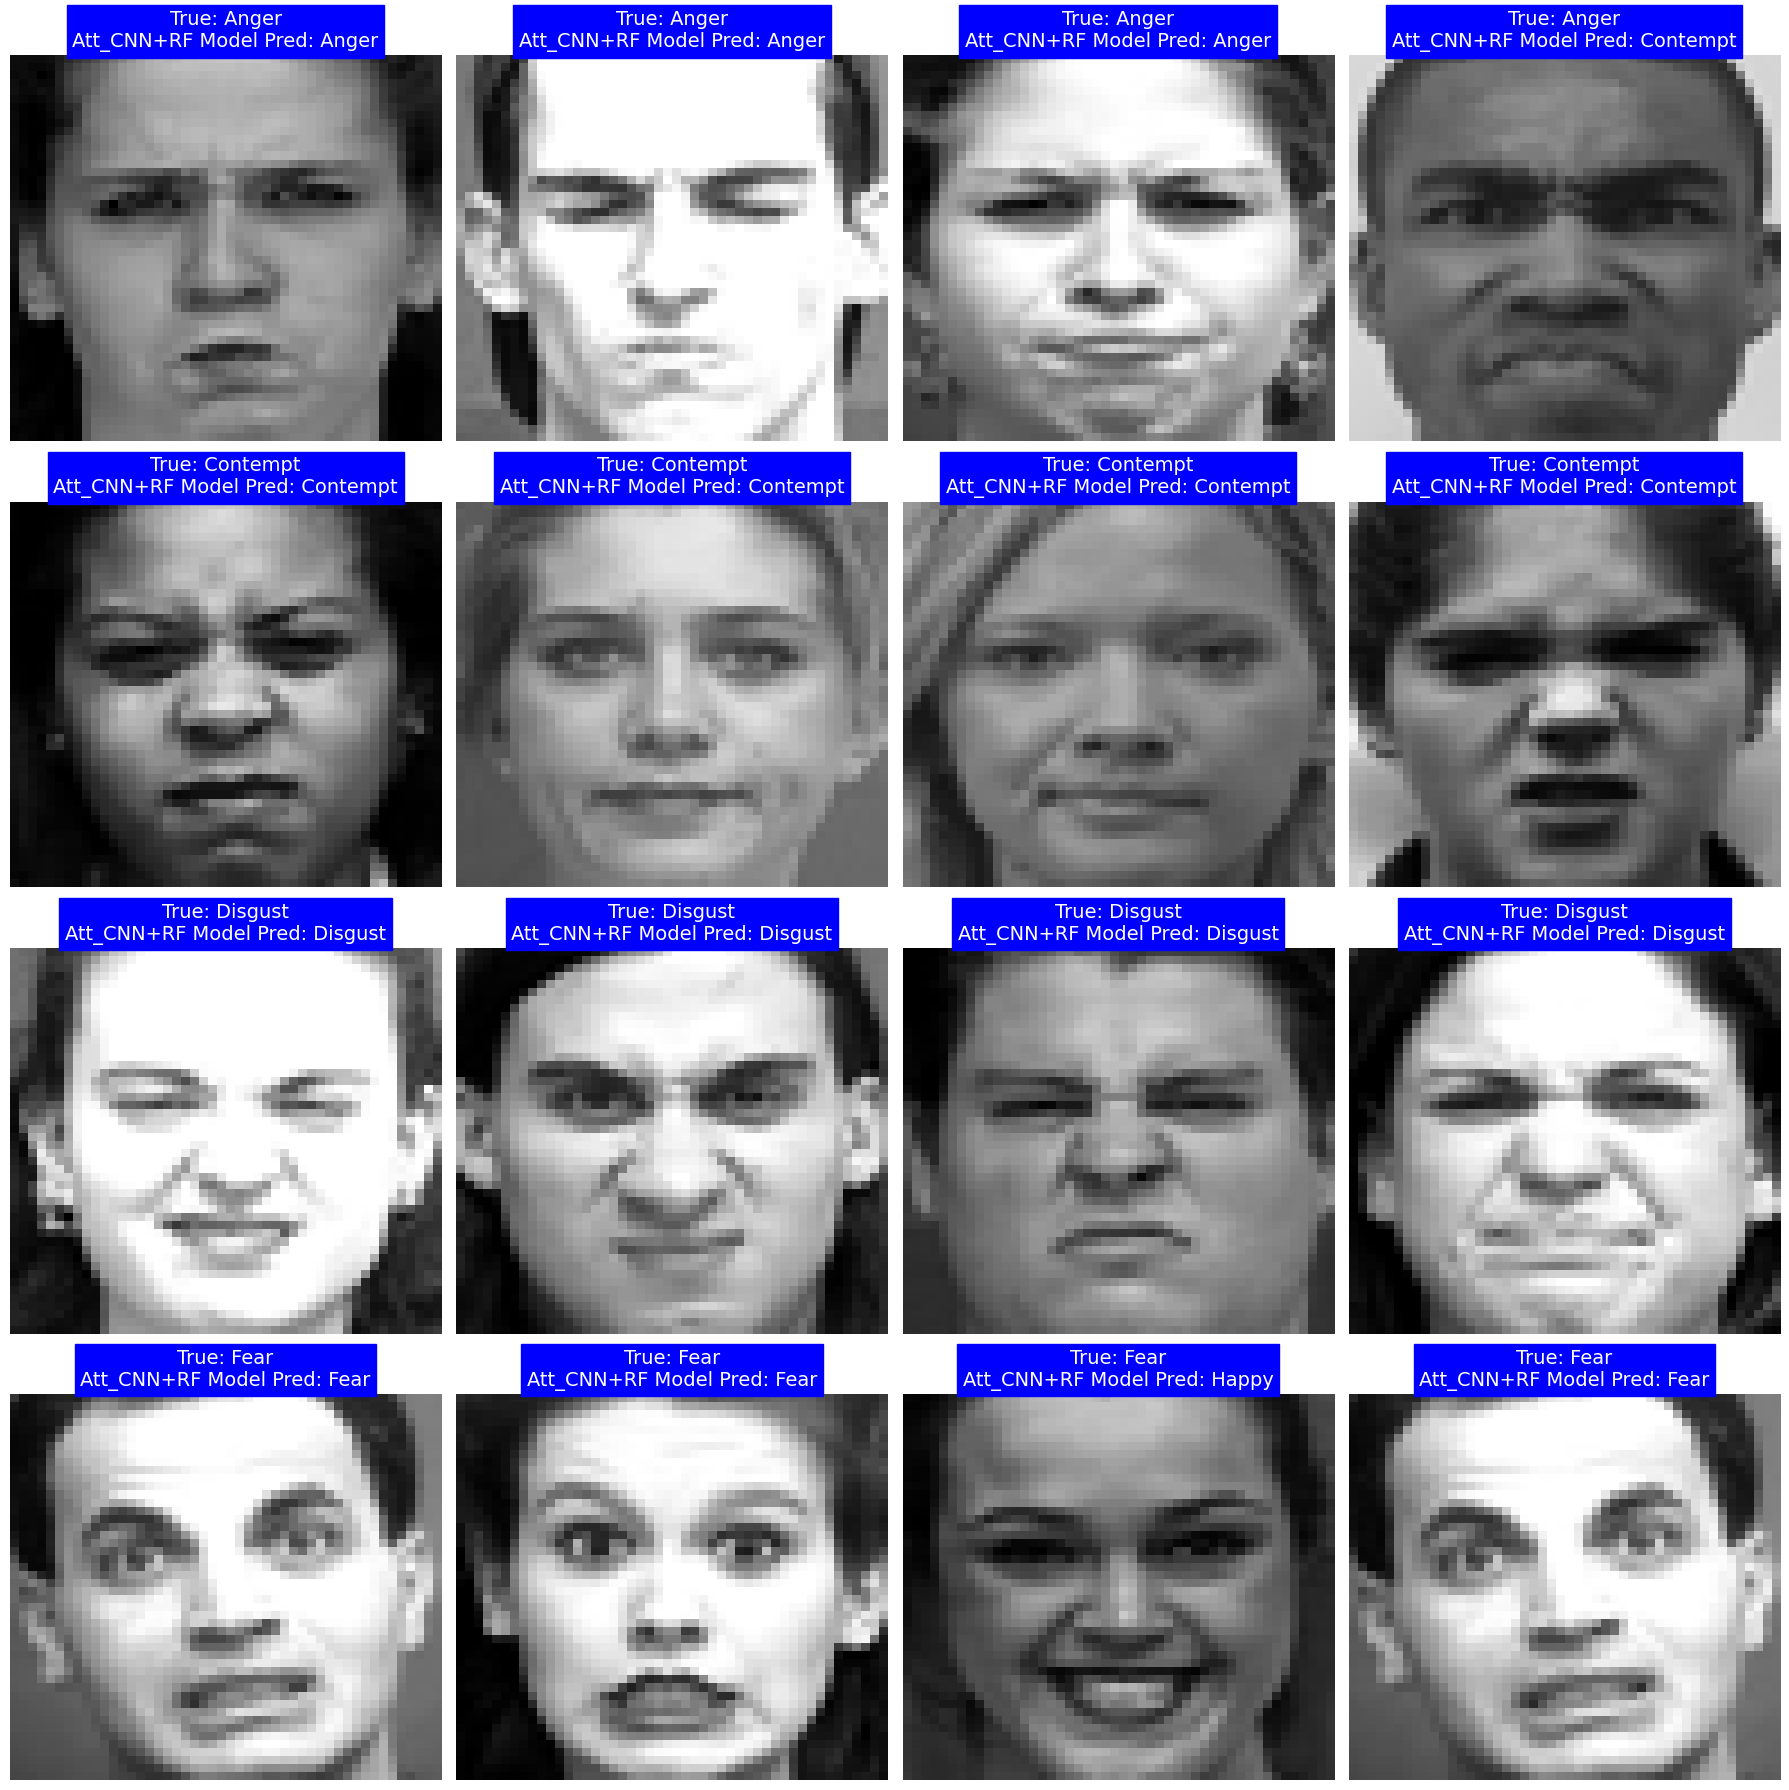

In [109]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+RF
model_path = 'Att_CNN_RF_best_weights_best_4.hdf5'
loaded_model_rf = load_model(model_path)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 4  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Lists to store predictions for each fold
rf_predictions = []

# Visualize the same three images in columns and three in rows
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first three images if available
        if len(class_indices) > 0:
            idx = class_indices[class_count[label_names[i]] % len(class_indices)]

            # Assuming you have predictions from your model
            rf_pred_probs = loaded_model_rf.predict(X_Test_[idx].reshape(1, 48, 48, 3))[0]
            rf_pred_idx = np.argmax(rf_pred_probs)

            img = X_Test_[idx]

            # Increase the size of the image
            axes[i, j].imshow(img, interpolation='nearest', aspect='auto')

            true_label = label_names[np.argmax(Y_Test[idx])]

            # Customize labels with different colors
            title = f'True: {true_label}\nAtt_CNN+RF Model Pred: {label_names[rf_pred_idx]}'
            axes[i, j].set_title(title, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count[label_names[i]] += 1

            # Store predictions for later use
            rf_predictions.append(rf_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+RF2.png', dpi=1200)

plt.show()


1/1 [==============================] - 0s 27ms/step


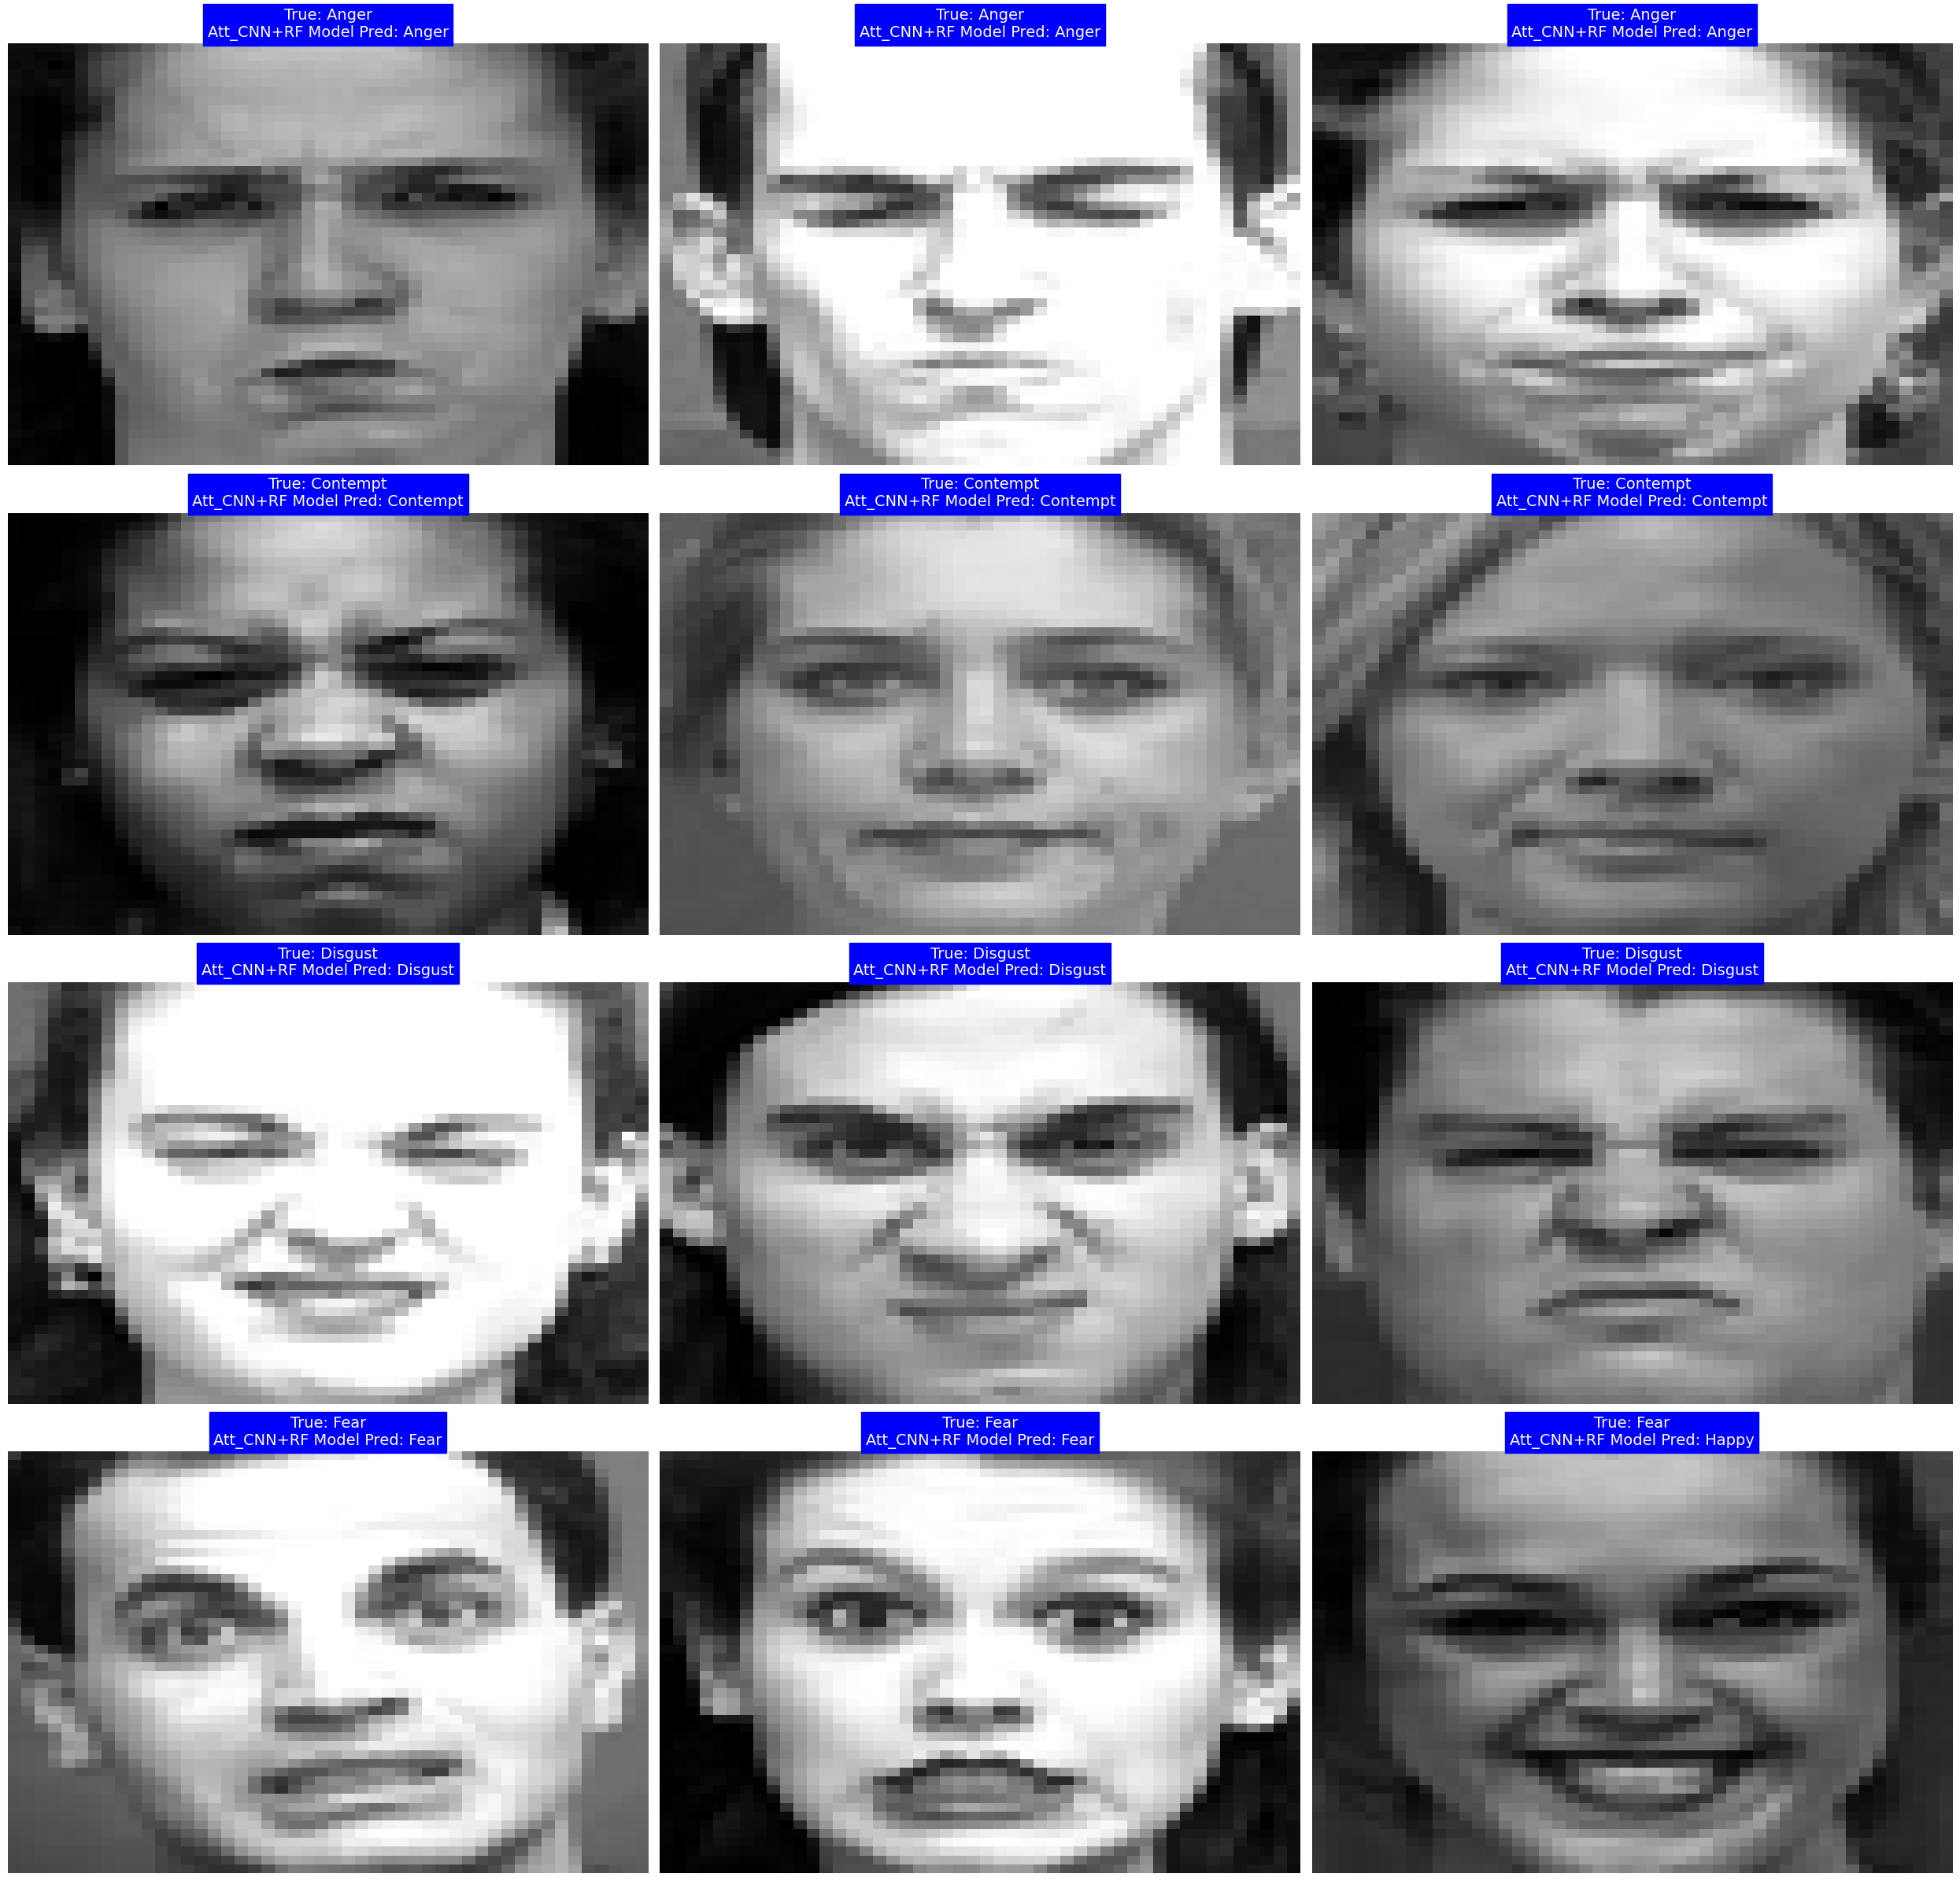

In [113]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+RF
model_path = 'Att_CNN_RF_best_weights_best_4.hdf5'
loaded_model_rf = load_model(model_path)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 3  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 24))

# Lists to store predictions for each fold
rf_predictions = []

# Visualize one image from each class
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first available image for the class
        if len(class_indices) > 0:
            idx = class_indices[class_count[label_names[i]] % len(class_indices)]

            # Assuming you have predictions from your model
            rf_pred_probs = loaded_model_rf.predict(X_Test_[idx].reshape(1, 48, 48, 3))[0]
            rf_pred_idx = np.argmax(rf_pred_probs)

            img = X_Test_[idx]

            # Increase the size of the image
            axes[i, j].imshow(img, interpolation='nearest', aspect='auto')

            true_label = label_names[np.argmax(Y_Test[idx])]

            # Customize labels with different colors
            title = f'True: {true_label}\nAtt_CNN+RF Model Pred: {label_names[rf_pred_idx]}'
            axes[i, j].set_title(title, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count[label_names[i]] += 1

            # Store predictions for later use
            rf_predictions.append(rf_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+RF3.png', dpi=1200)

plt.show()


# Visual results of Attention_CNN model with SVM classifier model:

1/1 [==============================] - 0s 24ms/step


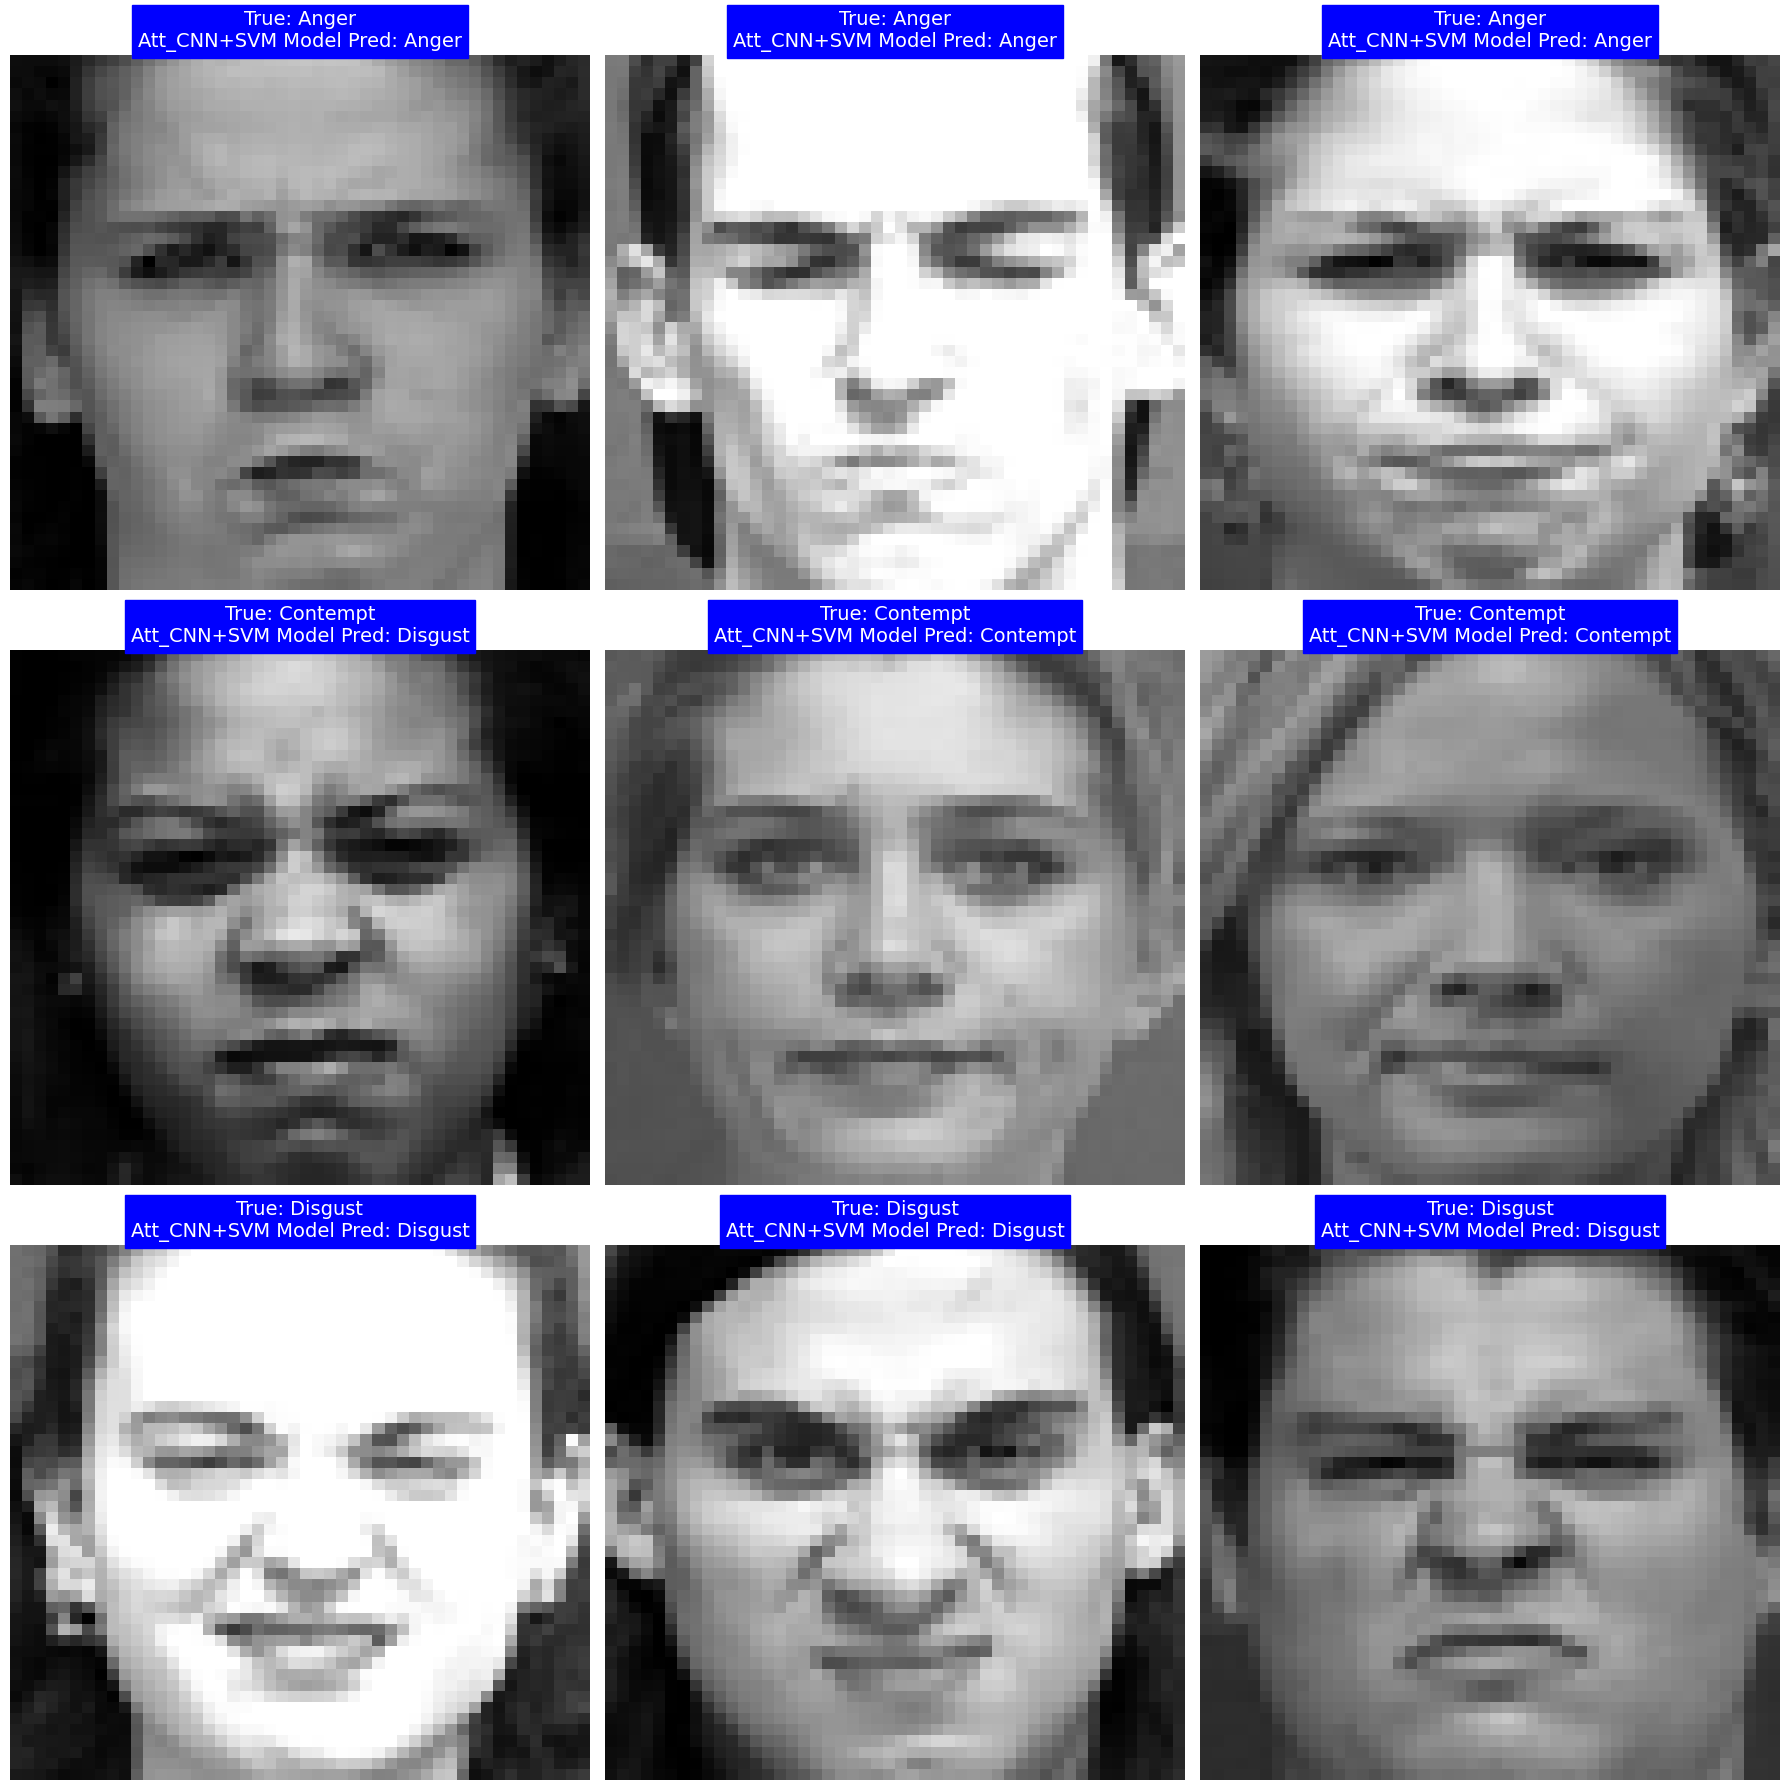

In [116]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+SVM
model_path_svm = 'Att_CNN_SVM_best_weights_best_4.hdf5'
loaded_model_svm = load_model(model_path_svm)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count_svm = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Lists to store predictions for each fold
svm_predictions = []

# Visualize one image from each class
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices_svm = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first available image for the class
        if len(class_indices_svm) > 0:
            idx_svm = class_indices_svm[class_count_svm[label_names[i]] % len(class_indices_svm)]

            # Assuming you have predictions from your model
            svm_pred_probs = loaded_model_svm.predict(X_Test_[idx_svm].reshape(1, 48, 48, 3))[0]
            svm_pred_idx = np.argmax(svm_pred_probs)

            img_svm = X_Test_[idx_svm]

            # Increase the size of the image
            axes[i, j].imshow(img_svm, interpolation='nearest', aspect='auto')

            true_label_svm = label_names[np.argmax(Y_Test[idx_svm])]

            # Customize labels with different colors
            title_svm = f'True: {true_label_svm}\nAtt_CNN+SVM Model Pred: {label_names[svm_pred_idx]}'
            axes[i, j].set_title(title_svm, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count_svm[label_names[i]] += 1

            # Store predictions for later use
            svm_predictions.append(svm_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+SVM1.png', dpi=1200)

plt.show()


1/1 [==============================] - 0s 25ms/step


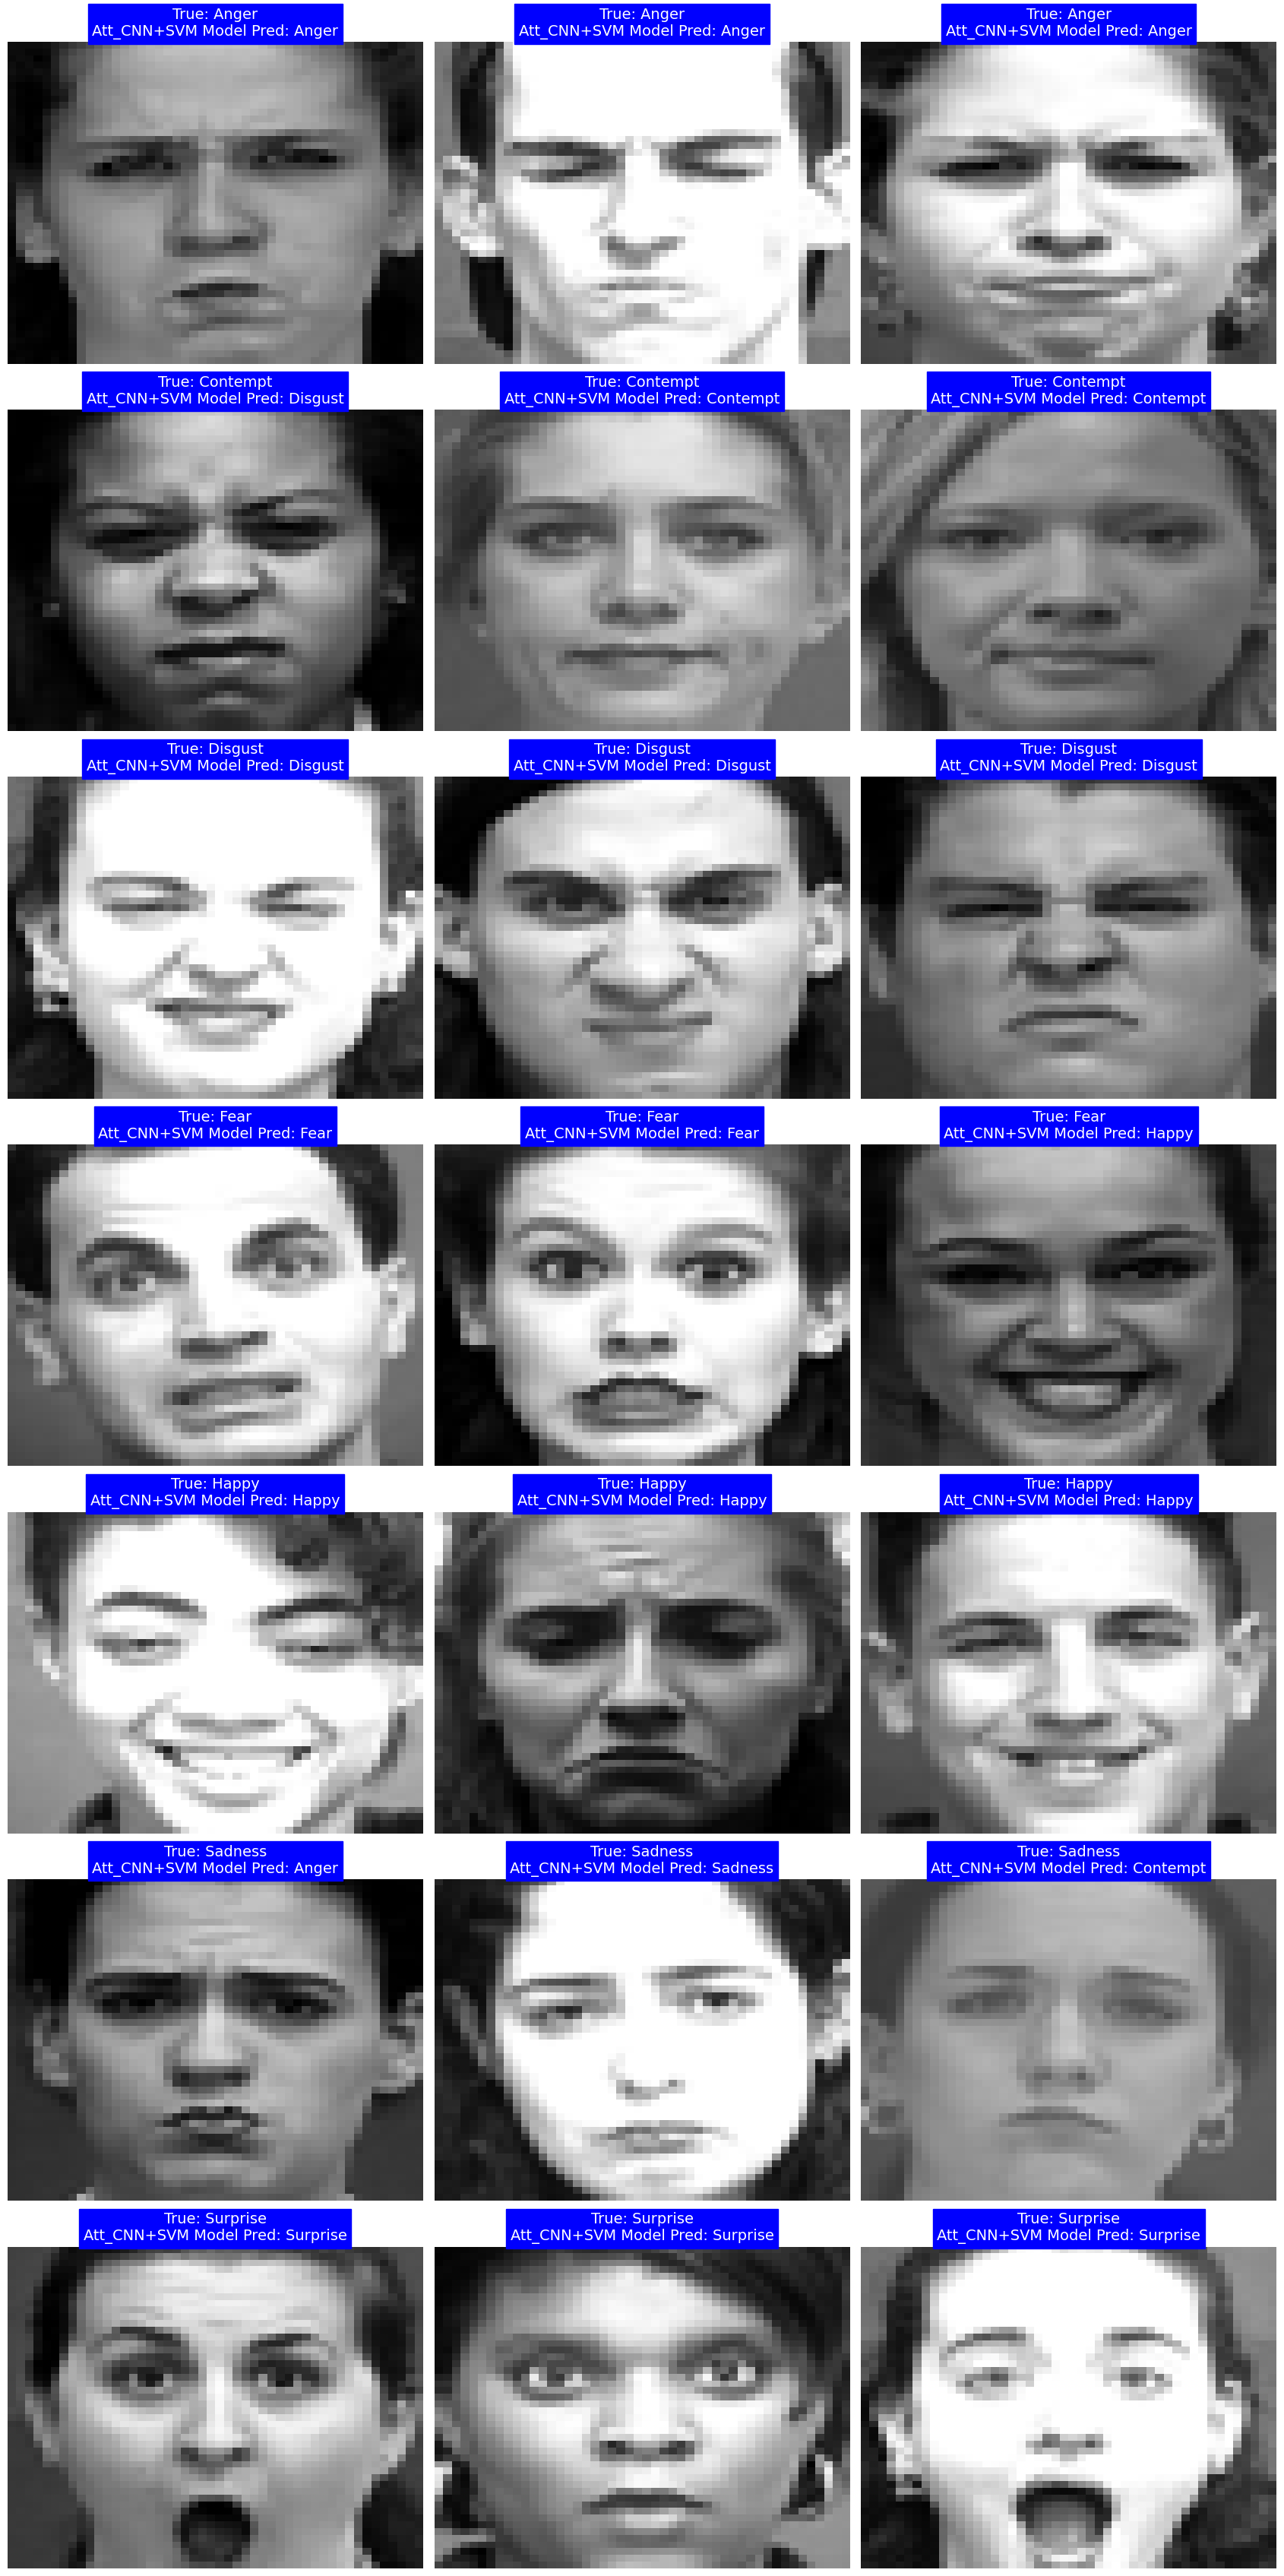

In [124]:
from tensorflow.keras.models import load_model

# Load the best weights for Att_CNN+SVM
model_path_svm = 'Att_CNN_SVM_best_weights_best_4.hdf5'
loaded_model_svm = load_model(model_path_svm)

# Assuming X_Test contains your test images and Y_Test contains true labels
label_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Initialize a dictionary to keep track of the number of times each class has been visualized
class_count_svm = {label: 0 for label in label_names}

# Define the number of rows and columns for the subplot grid
num_rows = 7
num_cols = 3  # You can adjust this based on your preference

# Set up the subplot grid with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 34))

# Lists to store predictions for each fold
svm_predictions = []

# Visualize one image from each class
for i in range(num_rows):
    for j in range(num_cols):
        # Find the indices of images with the current label
        class_indices_svm = np.where(np.argmax(Y_Test, axis=1) == i)[0]

        # Take the first available image for the class
        if len(class_indices_svm) > 0:
            idx_svm = class_indices_svm[class_count_svm[label_names[i]] % len(class_indices_svm)]

            # Assuming you have predictions from your model
            svm_pred_probs = loaded_model_svm.predict(X_Test_[idx_svm].reshape(1, 48, 48, 3))[0]
            svm_pred_idx = np.argmax(svm_pred_probs)

            img_svm = X_Test_[idx_svm]

            # Increase the size of the image
            axes[i, j].imshow(img_svm, interpolation='nearest', aspect='auto')

            true_label_svm = label_names[np.argmax(Y_Test[idx_svm])]

            # Customize labels with different colors
            title_svm = f'True: {true_label_svm}\nAtt_CNN+SVM Model Pred: {label_names[svm_pred_idx]}'
            axes[i, j].set_title(title_svm, fontsize=14, color='white', backgroundcolor='blue')

            axes[i, j].axis('off')  # Turn off axis ticks and labels

            # Update the count of visualized images for the current class
            class_count_svm[label_names[i]] += 1

            # Store predictions for later use
            svm_predictions.append(svm_pred_idx)

plt.tight_layout()
plt.savefig('Visualization_CNN+SVM2.png', dpi=1200)

plt.show()


# Live Test for Att_CNN+RF Model:

In [9]:
from keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
emotion_model = load_model('Att_CNN_RF_best_weights_best_2.hdf5')


class_labels=['Sad','Sad', 'Sad', 'happy','Neutral','Sad','Surprise']


cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,2)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Convert grayscale image to RGB
        roi = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

        # Get image ready for prediction
        roi = roi.astype('float') / 255.0  # Scale
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)  # Expand dims to get it ready for prediction (1, 48, 48, 3)

        preds = emotion_model.predict(roi)[0]  # Yields one hot encoded result for 7 classes
        label = class_labels[preds.argmax()]  # Find the label
        label_position = (x, y)
        cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step


# Live Test for Att_CNN+SVM Model:

In [13]:
from keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
emotion_model = load_model('Att_CNN_SVM_best_weights_best_4.hdf5')


class_labels=['Happy','Happy', 'Happy', 'Happy','Happy','Happy','Happy']


cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,2)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Convert grayscale image to RGB
        roi = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

        # Get image ready for prediction
        roi = roi.astype('float') / 255.0  # Scale
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)  # Expand dims to get it ready for prediction (1, 48, 48, 3)

        preds = emotion_model.predict(roi)[0]  # Yields one hot encoded result for 7 classes
        label = class_labels[preds.argmax()]  # Find the label
        label_position = (x, y)
        cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


# ......................END..........................